# Importing the log model

In [ ]:
import pandas as pd
import numpy as np
import pm4py
from pm4py import convert_to_event_log

# Load the CSV file into a pandas dataframe
df = pd.read_csv('Mobis_WS2425.csv', sep=';')

df["time:timestamp"] = pd.to_datetime(df["time:timestamp"])

# Ensure the case ID column is of type string
df["case:concept:name"] = df["case:concept:name"].astype(str)

print(df.head())

# Convert the dataframe to a pm4py log
event_log = convert_to_event_log(df, case_id_key="case:concept:name")

  case:concept:name                                       concept:name  \
0               105                                file travel request   
1               105  check if travel request needs preliminary pric...   
2               105                    decide on approval requirements   
3               105                      check if booking is necessary   
4               105                   check if expense documents exist   

  case:travel_start case:travel_end            time:timestamp  \
0        10.01.2017      15.01.2017 2017-01-17 11:17:00+00:00   
1        10.01.2017      15.01.2017 2017-01-17 11:23:00+00:00   
2        10.01.2017      15.01.2017 2017-01-17 11:24:00+00:00   
3        10.01.2017      15.01.2017 2017-01-17 11:24:00+00:00   
4        10.01.2017      15.01.2017 2017-01-18 05:59:00+00:00   

                type org:resource  cost  
0           Employee       JB8510   452  
1           Employee       JB8510     0  
2           Employee       JB8510     

# Use a discovery algorithm on the process

In [24]:
from pm4py import discover_petri_net_inductive as inductive_miner

net, initial_marking, final_marking = inductive_miner(event_log)

# Display the petri net

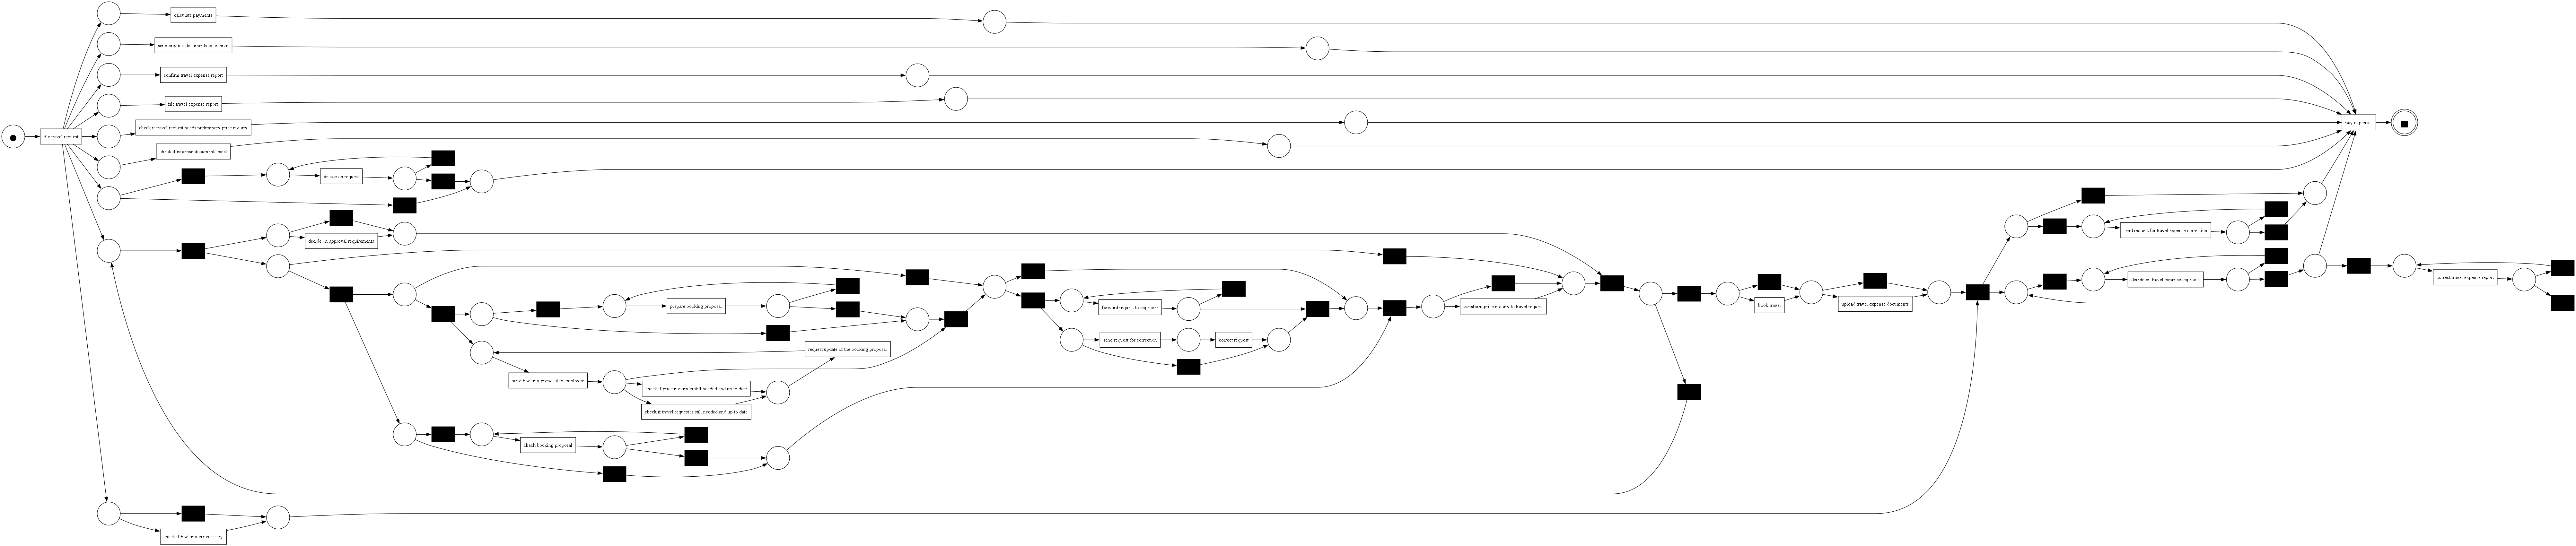

In [25]:
from pm4py.visualization.petri_net import visualizer as visualizer

gviz = visualizer.apply(net, initial_marking, final_marking)
visualizer.view(gviz)

# Check if no activities are on the weekends
Count how often an activity occurs each day of the week

In [26]:
# Extract the day of the week from the timestamp
df['day_of_week'] = df['time:timestamp'].dt.day_name()

# Count the occurrences of each day
day_counts = df['day_of_week'].value_counts()

# Print the results
for day, count in day_counts.items():
    print(f"{day}: {count}")

Monday: 20515
Wednesday: 8946
Thursday: 8836
Tuesday: 8765
Friday: 8686
Sunday: 44
Saturday: 17


# Count the size of the string in the resource column grouped by the type of resource
Different types of resources seem to be having a different lenght, but the same lenght in its group itself

In [27]:
# Group by the 'type' column and calculate the length of the strings in 'org:resource'
resource_lengths = df.groupby('type')['org:resource'].apply(lambda x: x.str.len())

# Get the minimum and maximum lengths for each type
length_summary = resource_lengths.groupby('type').agg(['min', 'max'])

# Print the results in the specified format
for resource_type, lengths in length_summary.iterrows():
    if lengths['min'] == lengths['max']:
        print(f"{resource_type}: {lengths['min']}")
    else:
        print(f"{resource_type}: {lengths['min']}-{lengths['max']}")

Accounting: 4-6
Employee: 4-6
Manager: 4-6
Travel Department: 6
